In [131]:
import pandas as pd


import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress = True)


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from surprise import KNNWithMeans,SVDpp
from surprise import accuracy

<IPython.core.display.Javascript object>

### Section B 1

In [2]:
df_data  = pd.read_csv("diabetes.csv")

In [3]:
df_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df_data.shape

(768, 9)

In [5]:
df_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df_data.Glucose = df_data.Glucose.replace(0, df_data['Glucose'].mean())

In [48]:
def replace_q(s):
    if s == '20c':
        return 500.0
    elif s=='!':
        return 0.0
    else:
        return float(s)

In [50]:
gmean = df_data.Glucose.mean()
df_data['Glucose'] = df_data['Glucose'].apply(lambda x : gmean if x == 0 else float(x))

In [9]:
df_data.BloodPressure = df_data.BloodPressure.replace(0,df_data['BloodPressure'].mean())
df_data.SkinThickness = df_data.SkinThickness.replace(0, df_data['SkinThickness'].mean())
df_data.Insulin = df_data.Insulin.replace(0,df_data['Insulin'].mean())
df_data.BMI = df_data.BMI.replace(0,df_data['BMI'].mean())

In [10]:
df_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


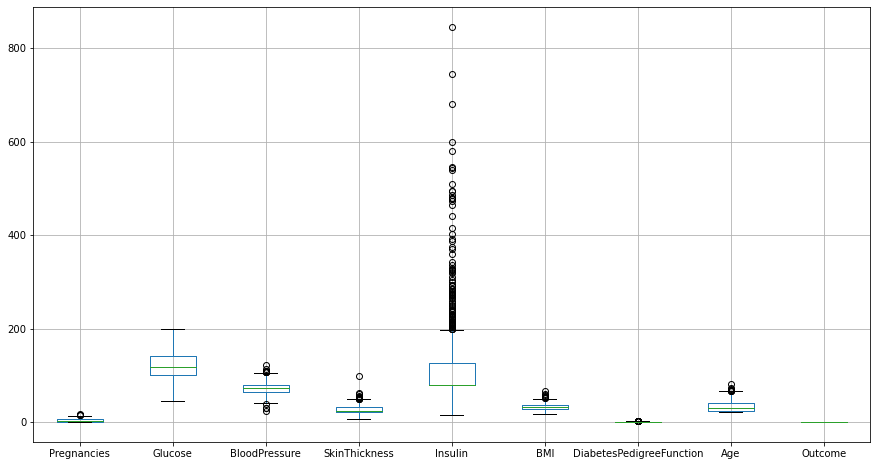

In [11]:
plt.rcParams['figure.figsize'] = [15,8]
df_data.boxplot()

plt.show()

In [12]:
Q1 = df_data.quantile(0.25)
Q3 = df_data.quantile(0.75)


IQR = Q3 - Q1

df_data = df_data[~((df_data <(Q1 - 1.5*IQR))|(df_data >(Q3 + 1.5*IQR))).any(axis=1)]

df_data.shape

(619, 9)

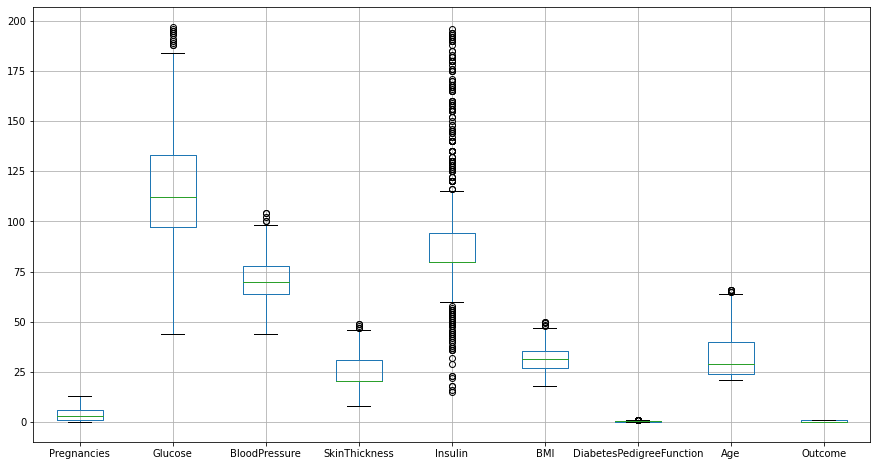

In [13]:
plt.rcParams['figure.figsize'] = [15,8]
df_data.boxplot()

plt.show()

In [14]:
X = df_data.drop('Outcome' , axis=1)

y = df_data['Outcome']

In [15]:
X_scle = StandardScaler().fit_transform(X)

 90% variance 



In [52]:
cov_matrix = np.cov(X_scle.T)
eig_vals,eig_vecs = np.linalg.eig(cov_matrix)

print("Eigen Vectors \n%s",eig_vecs)
print("Eigen Values \n%s",eig_vals)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Eigen Vectors 
%s [[-0.38184458 -0.41801801 -0.57075038 -0.2006415   0.13569076  0.06546065
  -0.43723523 -0.31554862]
 [-0.38588293 -0.03289394 -0.16196103  0.25942045  0.54257164 -0.45368361
   0.23935022  0.4460725 ]
 [-0.40585645 -0.17329719 -0.2495778   0.05109856 -0.55410518  0.27078449
   0.57988712  0.15402148]
 [-0.32314617  0.48427887 -0.04504779  0.64510219 -0.04738659  0.34049441
  -0.35042858 -0.04338516]
 [-0.24958917  0.35478476 -0.02933187 -0.29195869 -0.5101087  -0.57300607
  -0.32337887  0.18058804]
 [-0.37997116  0.42044062  0.17172933 -0.61148021  0.33182574  0.38808302
   0.10936255  0.05268474]
 [-0.14360267  0.25852364 -0.0108642   0.08063622  0.06096514 -0.34457473
   0.39457629 -0.79232861]
 [-0.45700286 -0.43605501  0.7437909   0.08958797 -0.06237011 -0.05430715
  -0.14227809 -0.11256624]]
Eigen Values 
%s [2.16241392 1.51690913 0.40367603 0.43939907 0.59548684 1.10675028
 0.854817   0.93349271]


In [66]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance explained",cum_var_exp)

<IPython.core.display.Javascript object>

Cumulative variance explained [ 26.98650655  45.91723846  59.72926743  71.37907552  82.047026
  89.47858627  94.96220144 100.        ]


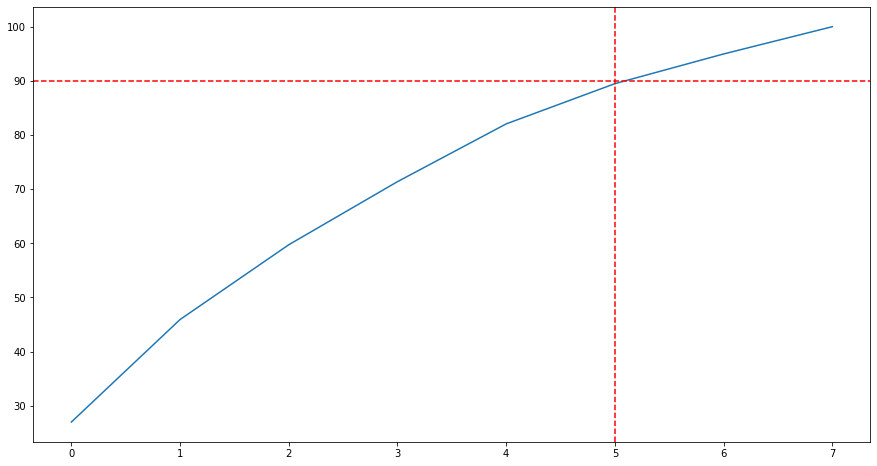

In [67]:
plt.plot(cum_var_exp)
plt.axvline(x=5, ymax=90, ls='--', color='r')
plt.axhline(y=90, xmax=90, ls='--', color='r')

In [68]:
print("Top 5 Eigen Vectors are :",sorted(eig_vals,reverse=True)[0:5])

Top 5 Eigen Vectors are : [2.162413922603593, 1.516909133660622, 1.1067502818064037, 0.9334927130349122, 0.8548170035264875]


In [55]:
var_exp

[26.986506546224163,
 18.930731918462527,
 13.81202896115423,
 11.649808090783033,
 10.667950488274824,
 7.431560269913932,
 5.483615167143568,
 5.037798558043704]

In [69]:
pca = PCA(0.90)
X_PCA = pca.fit(X_scle)

In [70]:
X_PCA.explained_variance_

array([2.16241392, 1.51690913, 1.10675028, 0.93349271, 0.854817  ,
       0.59548684, 0.43939907])

In [71]:
X_PCA.components_

array([[ 0.38184458,  0.38588293,  0.40585645,  0.32314617,  0.24958917,
         0.37997116,  0.14360267,  0.45700286],
       [-0.41801801, -0.03289394, -0.17329719,  0.48427887,  0.35478476,
         0.42044062,  0.25852364, -0.43605501],
       [-0.06546065,  0.45368361, -0.27078449, -0.34049441,  0.57300607,
        -0.38808302,  0.34457473,  0.05430715],
       [ 0.31554862, -0.4460725 , -0.15402148,  0.04338516, -0.18058804,
        -0.05268474,  0.79232861,  0.11256624],
       [ 0.43723523, -0.23935022, -0.57988712,  0.35042858,  0.32337887,
        -0.10936255, -0.39457629,  0.14227809],
       [ 0.13569076,  0.54257164, -0.55410518, -0.04738659, -0.5101087 ,
         0.33182574,  0.06096514, -0.06237011],
       [-0.2006415 ,  0.25942045,  0.05109856,  0.64510219, -0.29195869,
        -0.61148021,  0.08063622,  0.08958797]])

In [72]:
X_PCA.explained_variance_[:5]

array([2.16241392, 1.51690913, 1.10675028, 0.93349271, 0.854817  ])

In [73]:
X_PCA.components_[:5]

array([[ 0.38184458,  0.38588293,  0.40585645,  0.32314617,  0.24958917,
         0.37997116,  0.14360267,  0.45700286],
       [-0.41801801, -0.03289394, -0.17329719,  0.48427887,  0.35478476,
         0.42044062,  0.25852364, -0.43605501],
       [-0.06546065,  0.45368361, -0.27078449, -0.34049441,  0.57300607,
        -0.38808302,  0.34457473,  0.05430715],
       [ 0.31554862, -0.4460725 , -0.15402148,  0.04338516, -0.18058804,
        -0.05268474,  0.79232861,  0.11256624],
       [ 0.43723523, -0.23935022, -0.57988712,  0.35042858,  0.32337887,
        -0.10936255, -0.39457629,  0.14227809]])

### Section B 2

In [77]:
# 95% variance 
pca1 = PCA(0.95)
X_PCA_1 = pca1.fit_transform(X)

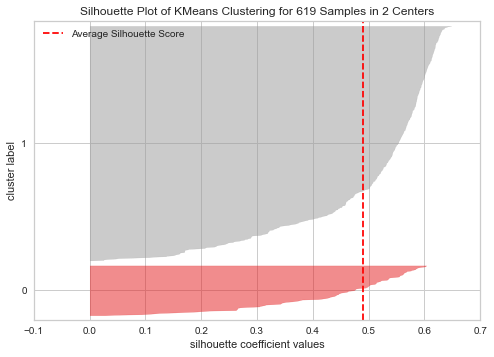

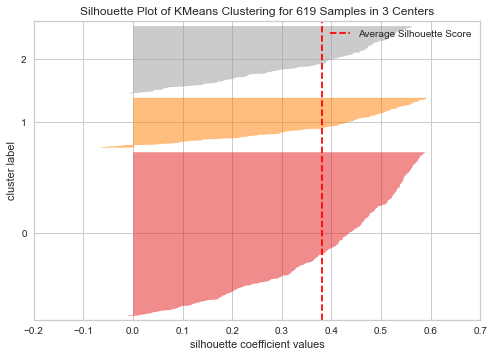

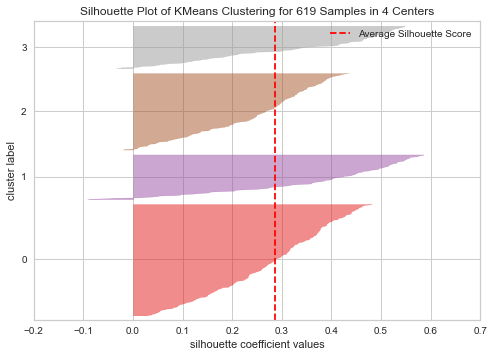

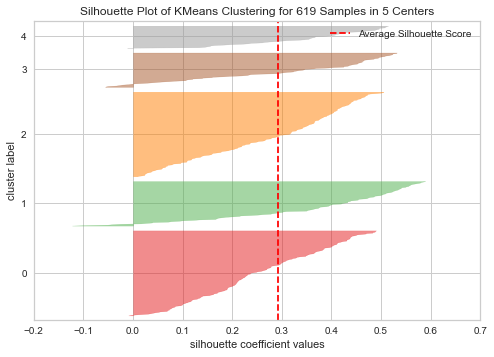

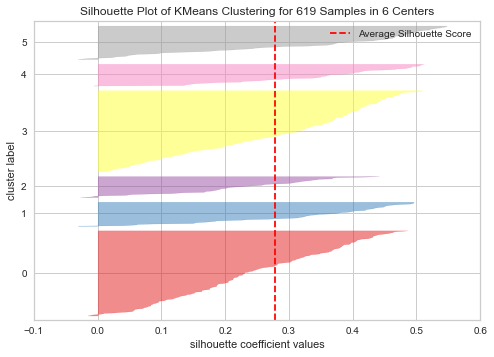

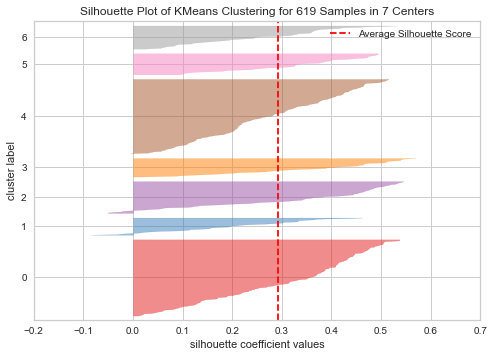

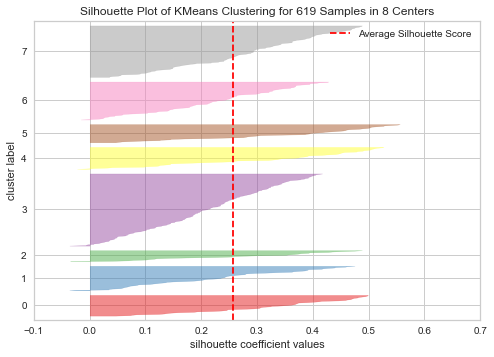

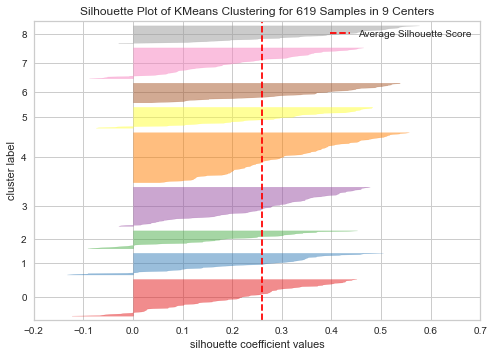

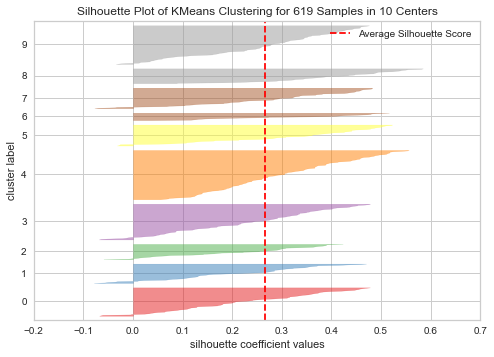

In [78]:
from yellowbrick.cluster import SilhouetteVisualizer
n_clusters=[2,3,4,5,6,7,8,9,10]

for K in n_clusters:
    model=KMeans(n_clusters=K,random_state=42)
    viz = SilhouetteVisualizer(model).fit(X_PCA_1)
    viz.show()

In [80]:
km = KMeans(n_clusters=2,random_state=42)
model = km.fit(X_PCA_1)
df_data['Cluster'] = model.labels_

In [81]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0,1


In [83]:
df_data[df_data['Cluster']==0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0
mean,3.752294,133.449541,70.981651,29.788991,155.045872,33.116514,0.507679,33.137615,0.449541,0.0
std,3.212118,25.049760,11.485886,9.298619,23.009412,5.262437,0.262091,10.561520,0.499745,0.0
min,0.000000,92.000000,44.000000,8.000000,120.000000,23.200000,0.085000,21.000000,0.000000,0.0
25%,1.000000,112.000000,62.000000,23.000000,135.000000,29.500000,0.292000,24.000000,0.000000,0.0
50%,3.000000,129.000000,70.000000,30.000000,155.000000,33.300000,0.487000,30.000000,0.000000,0.0
75%,6.000000,150.000000,80.000000,35.000000,175.000000,35.900000,0.692000,40.000000,1.000000,0.0
max,13.000000,195.000000,102.000000,49.000000,196.000000,46.100000,1.189000,63.000000,1.000000,0.0


In [84]:
df_data[df_data['Cluster']==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.0
mean,3.805882,113.861711,71.761726,24.279718,78.100434,31.216928,0.396845,32.364706,0.282353,1.0
std,3.237727,27.569698,10.850070,7.614907,15.109524,6.372463,0.236760,11.073443,0.450586,0.0
min,0.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000,1.0
25%,1.000000,95.000000,64.000000,20.536458,79.799479,26.500000,0.230250,23.000000,0.000000,1.0
50%,3.000000,109.000000,70.000000,20.536458,79.799479,30.950000,0.315000,28.000000,0.000000,1.0
75%,6.000000,128.000000,78.000000,29.000000,79.799479,35.075000,0.535000,39.000000,1.000000,1.0
max,13.000000,197.000000,104.000000,47.000000,125.000000,50.000000,1.191000,66.000000,1.000000,1.0


**Interpretation:** The above summary shows that the average Insulin in this cluster is 78 +/- 15 dev. On average, the gl level is 113.86.

# Optimal number of clusters  is 2 

# Section B 3 

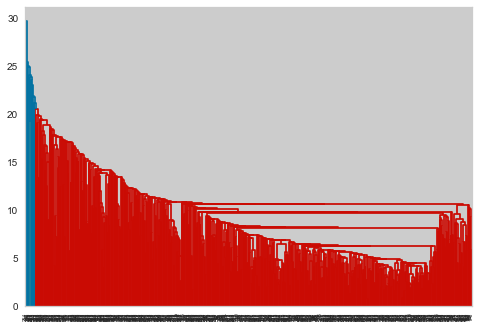

In [90]:
link = linkage(X_PCA_1, method='single')
dendrogram(link)
plt.show()

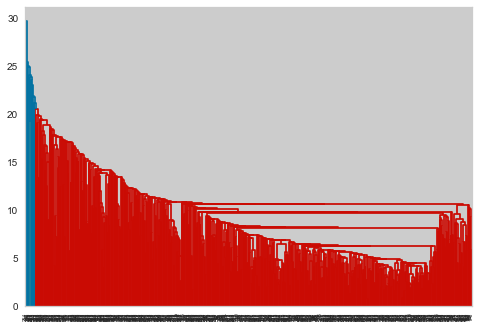

In [88]:
link = linkage(X_PCA_1, method='centroid')
dendrogram(link)
plt.show()

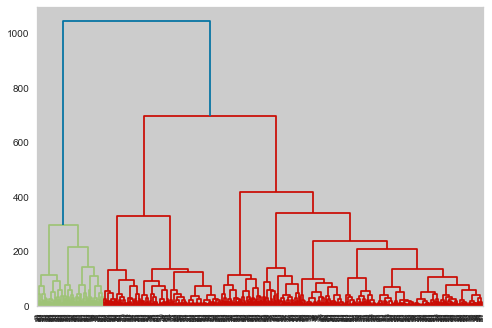

In [91]:
link = linkage(X_PCA_1, method='ward')
dendrogram(link)
plt.show()

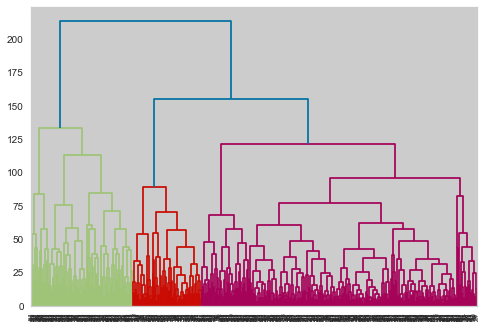

In [92]:
link = linkage(X_PCA_1, method='complete')
dendrogram(link)
plt.show()

# Section B 4

In [34]:
model_Km = KMeans(n_clusters = 4, random_state=40)
model_Km.fit(X_PCA_1)

df_data['Cluster_KM'] = model_Km.labels_

model = KMeans(n_clusters=4)
distances = model.fit_transform(X_PCA_1)
variance = 0
i = 0
for label in model.labels_:
    variance = variance + distances[i][label]
    i = i + 1
model.labels_

In [ ]:
#Bar plot

# Section C 1

# Normal

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40 )

rf = RandomForestClassifier(n_estimators=15)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
 
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

<IPython.core.display.Javascript object>

0.717741935483871


array([[65, 18],
       [17, 24]], dtype=int64)

# PCA 

In [105]:
pca = PCA(0.90 )
X_PCA_2 = pca.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA_2, y, test_size=0.20, random_state=40 )

rf = RandomForestClassifier(n_estimators=20)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
 
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

<IPython.core.display.Javascript object>

0.6693548387096774


array([[67, 16],
       [25, 16]], dtype=int64)

# SVD 

In [144]:
svd = TruncatedSVD(8)
X_SVD = svd.fit_transform(X)

In [145]:
np.cumsum(svd.explained_variance_/sum(svd.explained_variance_)*100)

<IPython.core.display.Javascript object>

array([ 44.82315378,  79.47897239,  91.50449354,  95.78208091,
        98.69090041,  99.69006169,  99.99745275, 100.        ])

In [146]:
svd = TruncatedSVD(3)
X_SVD = svd.fit_transform(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_SVD, y, test_size=0.20, random_state=40 )

rf = RandomForestClassifier(n_estimators=20)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
 
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

<IPython.core.display.Javascript object>

0.6854838709677419


array([[69, 14],
       [25, 16]], dtype=int64)

# LDA

In [149]:
#num of classes (2) ==> n_classes - 1 = 1
lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda = lda.fit_transform(X, y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.20, random_state=40 )

rf = RandomForestClassifier(n_estimators=20)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
 
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

<IPython.core.display.Javascript object>

0.7258064516129032


array([[68, 15],
       [19, 22]], dtype=int64)

# Scetion C 2

In [150]:
df_rating = pd.read_csv('ratings.csv')
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [151]:
df_rating.drop('timestamp', axis=1, inplace=True)
df_rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [156]:
df_rating[['movieId', 'rating']].groupby('movieId').mean().sort_values(by='rating', ascending=False)

,rating
movieId,
88448,5.0
100556,5.0
143031,5.0
143511,5.0
143559,5.0
...,...
157172,0.5
85334,0.5
53453,0.5


In [167]:
popularity_tabel = df_rating.groupby('movieId').agg({'rating':'mean', 'userId':'count'})
popularity_tabel.rename({'userId':'TotalCount'}, axis=1, inplace=True)
popularity_tabel = popularity_tabel.sort_values('rating', ascending= False)
popularity_tabel.head()

,rating,TotalCount
movieId,,
88448,5.0,1
100556,5.0,1
143031,5.0,1
143511,5.0,1
143559,5.0,1


In [169]:
 popularity_tabel[popularity_tabel['TotalCount'] > 250].head(5)

,rating,TotalCount
movieId,,
318,4.429022,317
260,4.231076,251
296,4.197068,307
2571,4.192446,278
356,4.164134,329


# Scetion C 3

In [173]:
df_rating

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [171]:
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split,cross_validate
from surprise import KNNWithMeans,SVDpp
from surprise import accuracy

In [176]:
reader = Reader(rating_scale=(1,5))
rating_data = Dataset.load_from_df(df_rating[['userId','movieId','rating']],reader)

[trainset,testset] = train_test_split(rating_data,test_size=0.15,shuffle=True)
trainsetfull=rating_data.build_full_trainset()

In [181]:
print("Number of users :",trainsetfull.n_users,'\n')
print("Number of movies :",trainsetfull.n_items,'\n')

Number of users : 610 

Number of movies : 9724 



In [182]:
alg=SVDpp()
alg.fit(trainsetfull)

In [185]:
alg.predict(uid=710,iid=166534)

Prediction(uid=710, iid=166534, r_ui=None, est=3.458872195705546, details={'was_impossible': False})

In [ ]:
results=cross_validate(algo=alg,data=rating_data,measures=['rmse'],cv=5,return_train_measures=True)